Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import importlib
import datetime as dt
from datetime import datetime
from pandas import concat
from math import sqrt
from sklearn import preprocessing
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics
from sklearn import preprocessing as prep
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error as MAPE

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score, make_scorer
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import check_array
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from epftoolbox.evaluation import sMAPE
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Define Functions for loading and processing results

In [ ]:
def preprocess_data(dat, y_col_prefix, forecast_prefix):
    lag_0y1_Forecast = dat[y_col_prefix+'_Forecast']
    lag_0y1_Forecast = lag_0y1_Forecast.dropna()
    pred_nn = []
    for i in range(24):
        lag = dat[y_col_prefix+'+'+str(i)+'_'+forecast_prefix]
        lag = lag.dropna()
        pred_nn.append(lag)
    pred_nn = pd.concat(pred_nn, axis=1)
    return pred_nn

def preprocess_actual_data(dat, y_col_prefix):
    Y_test = []
    for i in range(24):
        lag = dat[y_col_prefix+'+'+str(i)+'_Actual']
        lag = lag.dropna()
        Y_test.append(lag)
    Y_test = pd.concat(Y_test, axis=1)
    return Y_test

# Define a function to calculate sMAPE
def sMAPE(y_true, y_pred):
    return np.mean(200 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

# Define a function to calculate errors and store them in a DataFrame
def calculate_errors(Y_test, pred_nn):
    mse = mean_squared_error(Y_test, pred_nn)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, pred_nn)
    smape = sMAPE(Y_test, pred_nn) * 100
    return pd.DataFrame([mse, rmse, mae, smape]).T

Load in dataset:

In [2]:
date_format="%m/%d/%Y %H:%M"
date_parse = lambda date: dt.datetime.strptime(date, date_format)
dat1 = pd.read_csv("/home/ciaran/Documents/DAM_1-3.csv")
dat2 = pd.read_csv("/home/ciaran/Documents/DAM_4-6.csv")
dat3 = pd.read_csv("/home/ciaran/Documents/DAM_7-9.csv")
dat4 = pd.read_csv("/home/ciaran/Documents/DAM_10-12.csv")

dat1=pd.DataFrame(dat1)
dat2=pd.DataFrame(dat2)
dat3=pd.DataFrame(dat3)
dat4=pd.DataFrame(dat4)

Data Process BM

(92, 24)
(92, 24)
(91, 24)
(91, 24)
(90, 24)
(90, 24)
(92, 24)
(92, 24)
          0         1         2          3
0  31.90113  5.648109  4.056946  21.288064
            0          1         2          3
0  160.786833  12.680175  7.584501  22.256654
            0          1         2          3
0  184.091276  13.568024  6.967555  14.609575
            0          1          2          3
0  390.601657  19.763645  10.742856  17.836397
            0          1         2          3
0  191.972803  13.855425  7.339319  19.012788


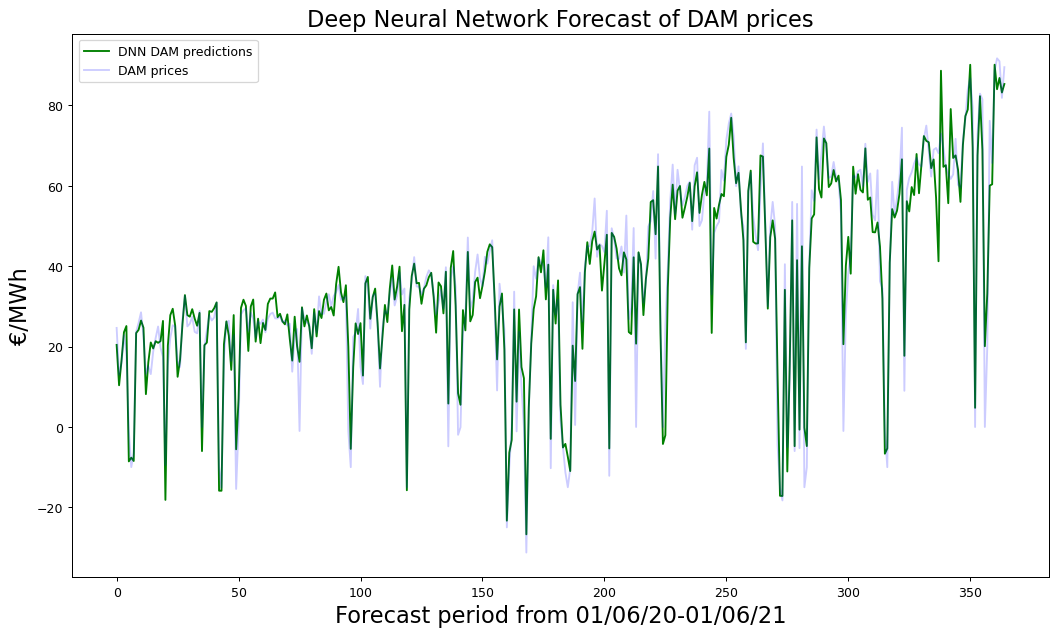

In [3]:
pred_nn1 = preprocess_data(dat1, 'EURPrices', 'Forecast')
pred_nn2 = preprocess_data(dat2, 'EURPrices', 'Forecast')
pred_nn3 = preprocess_data(dat3, 'EURPrices', 'Forecast')
pred_nn4 = preprocess_data(dat4, 'EURPrices', 'Forecast')

Y_test1 = preprocess_actual_data(dat1, 'EURPrices')
Y_test2 = preprocess_actual_data(dat2, 'EURPrices')
Y_test3 = preprocess_actual_data(dat3, 'EURPrices')
Y_test4 = preprocess_actual_data(dat4, 'EURPrices')

# Calculate errors for each set of predictions
errors = []
for i in range(1, 5):
    Y_test = globals()[f'Y_test{i}']
    pred_nn = globals()[f'pred_nn{i}']
    errors.append(calculate_errors(Y_test, pred_nn))

# Concatenate errors for individual sets of predictions
errors_concatenated = pd.concat(errors)

# Concatenate Y_test and pred_nn for plotting
YY_test = pd.concat([globals()[f'Y_test{i}'] for i in range(1, 5)], axis=0)
PPreds = pd.concat([globals()[f'pred_nn{i}'] for i in range(1, 5)], axis=0)

# Reset index for plotting
YY_test.reset_index(drop=True, inplace=True)
PPreds.reset_index(drop=True, inplace=True)

# Plotting
aa = pd.DataFrame(PPreds['EURPrices_Forecast'])
bb = pd.DataFrame(YY_test['EURPrices_Actual'])
figure(figsize=(14, 8), dpi=90)
plt.plot(aa, color='green', label='DNN DAM predictions')
plt.plot(bb, color='blue', label='DAM prices', alpha=0.2)
plt.xlabel('Forecast period from 01/06/20-01/06/21', fontsize=18)
plt.ylabel('€/MWh', fontsize=18)
plt.title("Deep Neural Network Forecast of DAM prices", fontsize=18)
plt.legend()
plt.show()

print(Y_test1.shape)
print(pred_nn1.shape)
print(Y_test2.shape)
print(pred_nn2.shape)
print(Y_test3.shape)
print(pred_nn3.shape)
print(Y_test4.shape)
print(pred_nn4.shape)
print(errors_concatenated)

Data process BM

In [ ]:
date_format="%m/%d/%Y %H:%M"
date_parse = lambda date: dt.datetime.strptime(date, date_format)
# dat = pd.read_csv("C:/Users/coconnor/Documents/BM_data.csv", index_col="SettlementPeriod", parse_dates=True, date_parser=date_parse)
dat1 = pd.read_csv("/home/ciaran/Documents/BM_SH_DNN_results/BM_results_SH_1-10.csv")
dat2 = pd.read_csv("/home/ciaran/Documents/BM_SH_DNN_results/BM_results_SH_1-13.csv")
dat3 = pd.read_csv("/home/ciaran/Documents/BM_SH_DNN_results/BM_results_SH_1-16.csv")
dat4 = pd.read_csv("/home/ciaran/Documents/BM_SH_DNN_results/BM_results_SH_1-19.csv")

dat1=pd.DataFrame(dat1)
dat2=pd.DataFrame(dat2)
dat3=pd.DataFrame(dat3)
dat4=pd.DataFrame(dat4)

# Loop through datasets and predictions
errors = []
for i in range(1, 5):
    dat = globals()[f'dat{i}']
    pred_nn = globals()[f'pred_nn{i}']
    Y_test = pd.concat([dat[f'lag_{j}y'].dropna() for j in range(2, 18)], axis=1)
    pred_nn = pd.concat([dat[f'lag_{j}y_Forecast'].dropna() for j in range(2, 18)], axis=1)
    errors.append(calculate_errors(Y_test, pred_nn))

# Concatenate errors for individual sets of predictions
errors_concatenated = pd.concat(errors)

# Concatenate Y_test and pred_nn for plotting
YY_test = pd.concat([globals()[f'YY_test{i}'] for i in range(1, 5)], axis=0)
PPreds = pd.concat([globals()[f'pred_nn{i}'] for i in range(1, 5)], axis=0)

# Reset index for plotting
YY_test.reset_index(drop=True, inplace=True)
PPreds.reset_index(drop=True, inplace=True)

# Plotting
aa = pd.DataFrame(PPreds['lag_2y_Forecast'])
bb = YY_test['lag_2y']

figure(figsize=(14, 8), dpi=90)
plt.plot(aa, color='green', label='DNN predictions')
plt.plot(bb, color='blue', label='BM prices', alpha=0.2)
plt.xlabel('Forecast period from 01/06/20-01/06/21', fontsize=18)
plt.ylabel('€/MWh', fontsize=18)
plt.title("Deep Neural Network Forecast of BM prices", fontsize=18)
plt.legend()
plt.show()

# Print errors
print(pred_nn1.shape)
print(pred_nn2.shape)
print(pred_nn3.shape)
print(pred_nn4.shape)
print(Y_test1.shape)
print(Y_test2.shape)
print(Y_test3.shape)
print(Y_test4.shape)
print(errors_concatenated)